In [5]:
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
conf = ["logit_perplexity_shared_sampling", "verbal_numerical_shared_sampling", "verbal_linguistic_shared_sampling"]

def get_confidence(conf):
    file_path = f"results/gpqa_Llama-3.3-70B-Instruct-Turbo-Free_{conf}_None.html"
    with open(file_path, "r", encoding="utf-8") as file:
        html_content = file.read()

    # Parse the HTML
    soup = BeautifulSoup(html_content, "html.parser")

    # Define a regex pattern for "Extracted Answer Confidence"
    pattern = re.compile(r"Extracted Answer Confidence:\s*([0-9]*\.?[0-9]+)", re.IGNORECASE)

    # Search through the text in the HTML
    matches = pattern.findall(soup.get_text())

    # Print the extracted confidence values
    return np.array(matches, dtype=float)

In [7]:
confidence = [get_confidence(c) for c in conf]

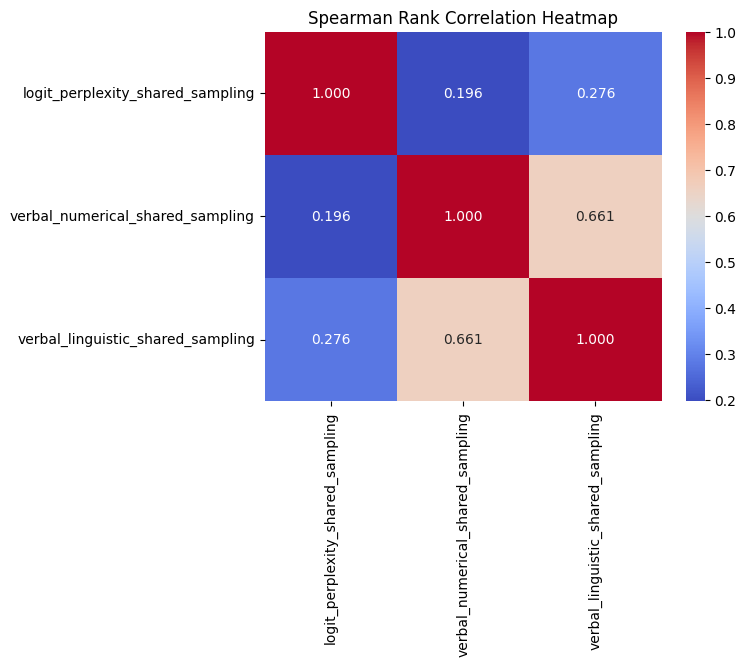

In [ ]:
df = pd.DataFrame({
    c: get_confidence(c) for c in conf
})

# Compute Spearman rank correlation
corr = df.corr(method='spearman')

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Spearman Rank Correlation Heatmap")
plt.show()